# Project 02 : bike-sharing-demand with LinearRegression Model

1. 데이터 가져오기
    + 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [15]:
import pandas as pd

train_df = pd.read_csv('g:/내 드라이브/Aiffel_Nodes/data_preprocess/bike_sharing_demand/train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
    + to_datetime 활용

In [18]:
# 판다스의 datetime으로 변환하고 시간을 각각 컬럼으로 생성
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
train_df['year'] = train_df["datetime"].dt.year
train_df['month'] = train_df["datetime"].dt.month
train_df['day'] = train_df["datetime"].dt.day
train_df['hour'] = train_df["datetime"].dt.hour
train_df['minute'] = train_df["datetime"].dt.minute
train_df['second'] = train_df["datetime"].dt.second
train_df[['datetime','year','month','day','hour','minute','second']].head()

,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


3. year, month, day, hour, minute, second 데이터 개수 시각화하기
    + sns.countplot 활용해서 시각화하기
    + subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<Axes: xlabel='second', ylabel='count'>

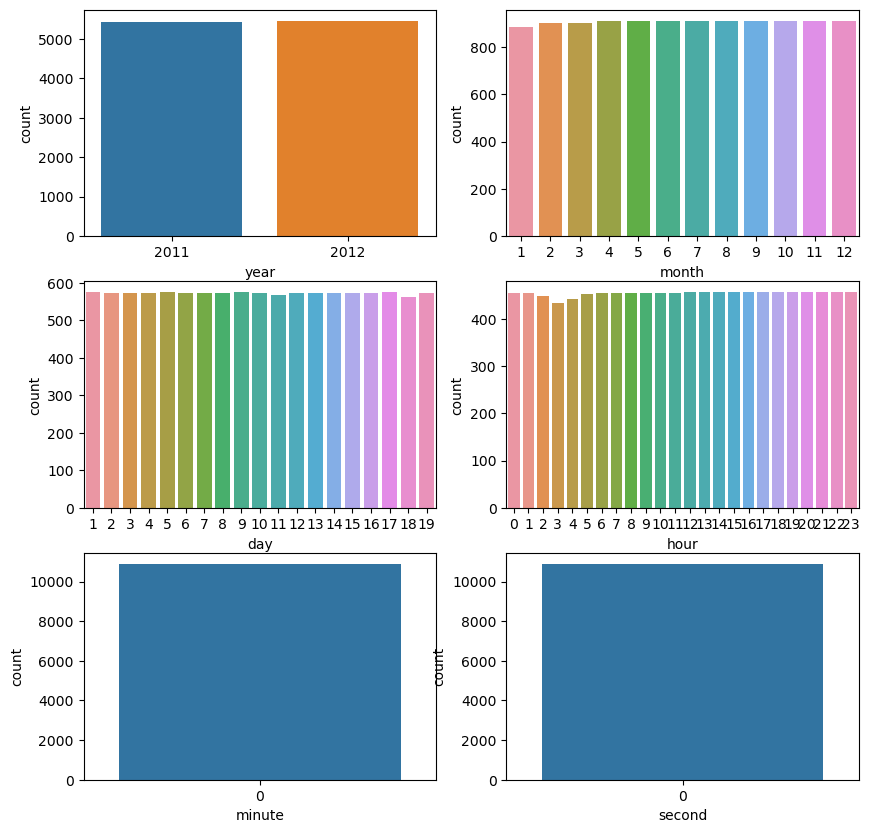

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기위한 figure 창을 생성. (사이즈는 안에 들어갈 plot을 보고 설정함)
plt.figure(figsize=(10, 10))

# figure안에 6개의 그래프 추가. 3*2 사이즈의 그래프를 하나씩 추가
plt.subplot(321)
sns.countplot(data=train_df, x = 'year')
plt.subplot(322)
sns.countplot(data=train_df, x = 'month')
plt.subplot(323)
sns.countplot(data=train_df, x = 'day')
plt.subplot(324)
sns.countplot(data=train_df, x = 'hour')
plt.subplot(325)
sns.countplot(data=train_df, x = 'minute')
plt.subplot(326)
sns.countplot(data=train_df, x = 'second')


4. X, y 컬럼 선택 및 train/test 데이터 분리
    + X(feature)에 컬럼을 조합해보며 데이터 넣기.ex) count(자전거 대여량)를 예측하는데 casual,registered 컬럼이 필요할까요?
    + count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기 

In [28]:
origin_df = train_df

In [42]:
# 어떤 컬럼이 있는지 확인
train_df = origin_df
print("컬럼 제거 전 : ",train_df.keys())

y = train_df['count']

train_df = train_df.drop('casual',axis = 'columns') # 미등록 사용자 대여수
train_df = train_df.drop('registered',axis = 'columns') # 등록 사용자 대여수
train_df = train_df.drop('datetime',axis = 'columns') 
train_df = train_df.drop('second',axis = 'columns') # 모두 0
train_df = train_df.drop('minute',axis = 'columns') # 모두 0
train_df = train_df.drop('count',axis = 'columns') # 정답 데이터

print("컬럼 제거 후 : ",train_df.keys())

컬럼 제거 전 :  Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')
컬럼 제거 후 :  Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = \
    train_test_split(train_df, y,test_size=0.25,random_state=41)
    
print('훈렵집합과 테스트집합의 입력값의 shape\n',X_train.shape,X_test.shape)
print('훈렵집합과 테스트집합의 정답(label)값의 shape\n',y_train.shape,y_test.shape)

훈렵집합과 테스트집합의 입력값의 shape
 (8164, 12) (2722, 12)
훈렵집합과 테스트집합의 정답(label)값의 shape
 (8164,) (2722,)


5. LinearRegression 모델 학습
    + sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 불러오기
model.fit(X_train, y_train) # 모델 학습하기

LinearRegression()

6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
    + 학습된 모델에 X_test를 입력해서 예측값 출력하기
    + 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
    + mse 값과 함께 rmse 값도 계산하기

In [48]:
from sklearn.metrics import mean_squared_error

test_pred = model.predict(X_test)
MSE = mean_squared_error(test_pred, y_test)
RMSE = MSE**0.5

print(f" MSE 오차는 : {MSE}\n RMSE 오차는 : {RMSE}")

 MSE 오차는 : 20619.64878501189
 RMSE 오차는 : 143.5954344156244


7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
    + x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
    + x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

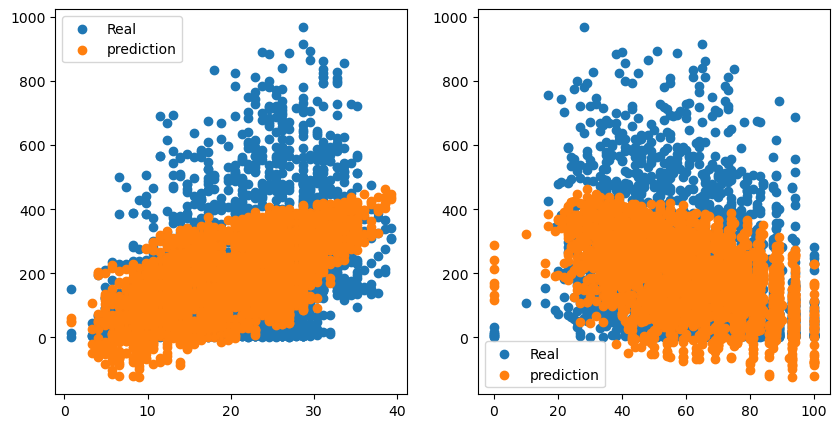

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_test['temp'], y_test, label="Real")
plt.scatter(X_test['temp'], test_pred, label="prediction")
plt.legend()
plt.subplot(122)
plt.scatter(X_test['humidity'], y_test, label="Real")
plt.scatter(X_test['humidity'], test_pred, label="prediction")
plt.legend()
plt.show()